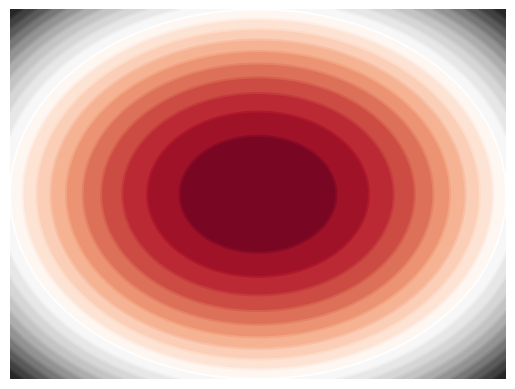

In [56]:
#create the contour plot of the function f(x,y) = x^2 + y^2
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x, y)
Z = X**2 + Y**2

plt.contour(X, Y, Z, 20, cmap='RdGy')
#createe the colorplot, not the contour plot
plt.contourf(X, Y, Z, 20, cmap='RdGy')
plt.xlabel('x')
plt.ylabel('y')
#remove the axis
plt.axis('off')
plt.savefig('contour_plot.png', dpi=400)

plt.show()

In [58]:
import plotly.graph_objects as go
import numpy as np
from PIL import Image

# Load the uploaded image and get its dimensions
background_image_path = "contour_plot.png"
img = Image.open(background_image_path)
img_width, img_height = img.size

# Generate data for the moving point
N = 50
s = np.linspace(-1, 1, N)
xx = s + s ** 2
yy = s - s ** 2

# Create figure with the static background image and moving point
fig = go.Figure(
    data=[
        go.Scatter(x=[xx[0]], y=[yy[0]], mode="markers", marker=dict(color="red", size=10))
    ],
    layout=go.Layout(
        images=[dict(
            source=background_image_path,
            xref="x", yref="y",
            x=-5, y=5,
            sizex=10, sizey=10,
            sizing="stretch",
            opacity=1,
            layer="below"
        )],
        width=img_width/5,
        height=img_height/5,
        xaxis=dict(range=[-5, 5], autorange=False, zeroline=False),
        yaxis=dict(range=[-5, 5], autorange=False, zeroline=False),
        hovermode="closest",
        updatemenus=[dict(type="buttons", buttons=[dict(label="Play", method="animate", args=[None])])]
    ),
    frames=[
        go.Frame(
            data=[
                go.Scatter(x=[xx[k]], y=[yy[k]], mode="markers", marker=dict(color="red", size=10))
            ]
        ) for k in range(N)
    ]
)

#remove the white grid
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

#remove the space between the axis and the plot
fig.update_xaxes(showline=True, linewidth=1, linecolor='black', mirror=True)
fig.update_yaxes(showline=True, linewidth=1, linecolor='black', mirror=True)
fig.show()


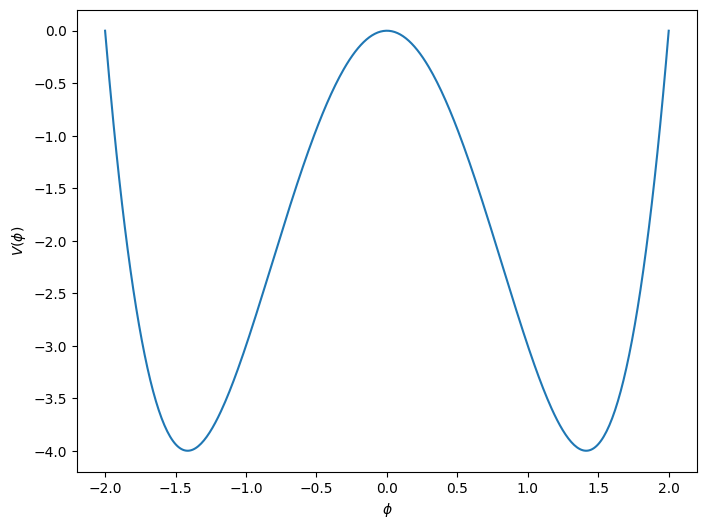

In [92]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the Higgs potential
mu_squared = -4  # Typically, mu^2 is negative for the Higgs mechanism
lambda_val = 1

# Define the potential function
def higgs_potential(phi, mu_squared, lambda_val):
    return mu_squared * phi**2 + lambda_val * phi**4

# Generate data
phi_values = np.linspace(-2, 2, 400)
potential_values = higgs_potential(phi_values, mu_squared, lambda_val)

# Plot the potential
plt.figure(figsize=(8, 6))
plt.plot(phi_values, potential_values, label=r'$V(\phi) = \mu^2 \phi^2 + \lambda \phi^4$')
plt.xlabel(r'$\phi$')
plt.ylabel(r'$V(\phi)$')
plt.show()
